# Logistic Regression Mini Project - Binary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In the following mini-project, logistic regression has been used for a binary classification problem using the Iris dataset. In this exercise, various measured physical characteristics will be used to train a model which can be used to predict the particular class of Iris flower that each sample in the data set belongs to.   

## Exploratory Data Analysis

Read in the Iris dataset and merge the feature variables with the target variables. From this it can be seen that we have four variables (sepal length, sepal width, petal length and petal width) that can be used to predict which of the three classes of Iris flowers the sample belongs to.

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
groups = list(iris.target)
iris_df['Groups'] = pd.Series([iris.target_names[k] for k in groups])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Groups
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


['setosa' 'versicolor' 'virginica']


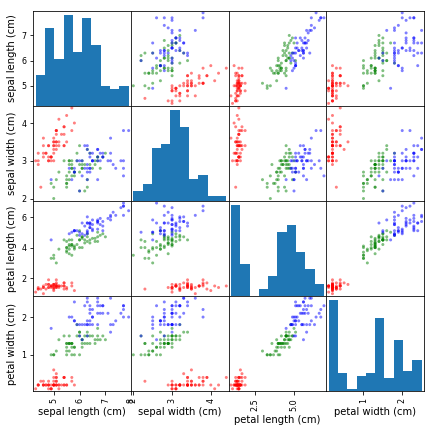

In [11]:
print(iris_df['Groups'].unique())
color_palette = {0: "red", 1: "green", 2: "blue"}
colors = [color_palette[c] for c in groups]
matrix_of_scatterplots = pd.plotting.scatter_matrix(iris_df, alpha = 0.5, figsize=(7,7), color=colors)
filename = 'Iris.png'
plt.savefig(filename, transparent=False, dpi=200, bbox_inches="tight")

From the scatter plot matrix shown above, it can be seen that the setosa class is linearly seperable from the versicolor and virginica classes. For this project, the versicolor and virginica classes will be considered as the same class thus therefore converting this into a binary classification problem as it shown below. 

## Logistic Regression for Binary Classification

In [8]:
color_palette_binary = {0: "red", 1: "black"}
groups_binary = (iris.target > 0) * 1
iris_df['Groups_Binary'] = pd.Series([iris.target_names[k] for k in groups_binary])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Groups,Groups_Binary
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


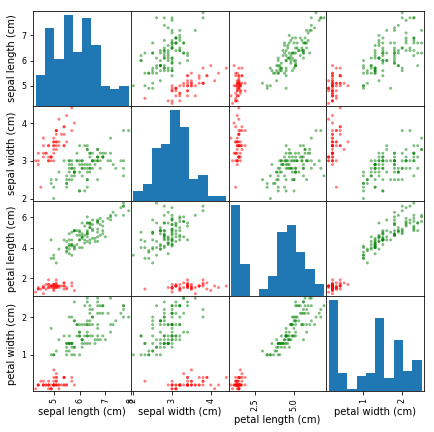

In [10]:
colors_binary = [color_palette[c] for c in groups_binary]
matrix_of_scatterplots = pd.plotting.scatter_matrix(iris_df, alpha = 0.5, figsize=(7,7), color=colors_binary)
filename = 'Iris-2.png'
plt.savefig(filename, transparent=False, dpi=200, bbox_inches="tight")

### Hypothesis Function

The objective of logistic regression is to predict the probability of a particular outcome given a set of input variables. Therefore, to ensure that the output is constrained between 0 and 1, the sigmoid function (below) is used as the hypothesis function for logistic regression.

Text(0.5,1,'Sigmoid Function')

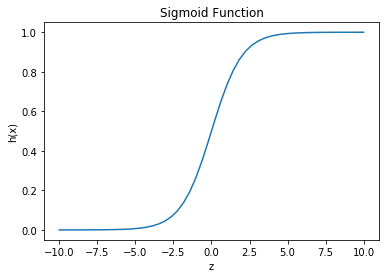

In [6]:
z = np.linspace(-10,10)
plt.plot(z, 1 / (1 + np.exp(-z)))
plt.xlabel('z')
plt.ylabel('h(x)')
plt.title('Sigmoid Function')

In [14]:
def sigmoid(X, theta):
    
    z = np.dot(X, theta)
    h = 1 / (1 + np.exp(-z))
    
    return h

# Feature matrix (X)
X = iris_df.iloc[:, 0:4]
bias = np.ones((X.shape[0], 1))
X = np.concatenate((bias, X), axis = 1)

# Initial theta values
theta_init = np.ones((X.shape[1]))

# Target variables vector (y)
y = groups_binary

# Hypothesis function
h = sigmoid(X, theta_init)
h

array([ 0.99998633,  0.99997246,  0.99996957,  0.99996957,  0.99998633,
        0.99999588,  0.99997746,  0.99998489,  0.99994983,  0.99997508,
        0.9999925 ,  0.9999833 ,  0.99996637,  0.99992515,  0.99999497,
        0.99999774,  0.99999386,  0.99998763,  0.99999627,  0.99999171,
        0.99999171,  0.99999171,  0.99996957,  0.99999083,  0.99998763,
        0.9999796 ,  0.9999888 ,  0.9999888 ,  0.99998633,  0.99997746,
        0.99997746,  0.99999171,  0.99999321,  0.99999545,  0.99997508,
        0.99997508,  0.99998987,  0.99997508,  0.99994983,  0.99998633,
        0.99998489,  0.99991728,  0.99995892,  0.99999171,  0.99999497,
        0.99997246,  0.99999171,  0.99996957,  0.99999171,  0.99998154,
        0.99999997,  0.99999994,  0.99999997,  0.99999925,  0.99999992,
        0.99999977,  0.99999995,  0.99999663,  0.99999992,  0.99999932,
        0.99999627,  0.99999983,  0.99999932,  0.9999999 ,  0.99999944,
        0.99999994,  0.99999983,  0.99999954,  0.99999979,  0.99

### Loss Function

The loss (or cost) function that is used in logistic regression is shown below:

In [15]:
def loss(h, y):
    
    m = len(y)
    
    J = (1/m)*np.sum(-y * np.log(h) - (1-y) * np.log(1 - h))
    
    return J

J = loss(h, y)
J

3.7106734388787239

The loss function (log loss) used in logistic regression can be intuitively explained by the figures below. This shows that for the case when y = 0, the output of the loss function is close to zero at small values of h(x) and grows exponentially as h(x) tends to one. The oppostite is then true for the case when y = 1. 

Text(0.5,0,'h(x)')

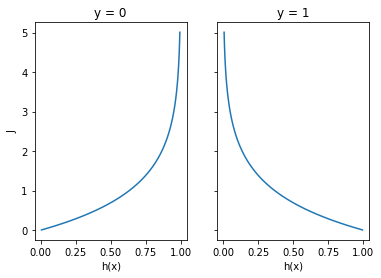

In [74]:
z = np.linspace(-5,5,100)
y_0 = 0; y_1 = 1
ls_0 = -y_0 * np.log(h) - (1-y_0) * np.log(1 - h)
ls_1 = -y_1 * np.log(h) - (1-y_1) * np.log(1 - h)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(h, ls_0)
ax2.plot(h, ls_1)
ax1.set_title('y = 0')
ax2.set_title('y = 1')
ax1.set_ylabel('J')
ax1.set_xlabel('h(x)')
ax2.set_xlabel('h(x)')

### Gradient Descent

The gradient descent algorithm is used to iteratively update the model parameters that minimize the loss function. The amount by which the parameters are changed by on each iteration of the gradient descent algorithm is based on the learning rate and the partial derivative of the loss function with respect to the parameters.  

In [118]:
# Partial derivative function of the loss function
grad = (1/y.shape[0])*np.dot(X.T, h-y)

### Prediction and Model Accuracy

Once the optimal model parameters have been determined, the final step is to test the model and determine the accuracy of the predictions.

In [119]:
def predict_class(X, theta):
    
    h_pred = (sigmoid(X, theta) >= 0.5) * 1
    
    return h_pred

def model_accuracy(h_pred, y):
    
    return (h_pred == y).mean()

### Full Model

In the following section, the different functions will be combined to build and test the model.

In [149]:
class BinaryLogisticRegression: 
    
    def __init__(self, lr = 0.01, num_iter = 10000, verbose = False):
        
        self.lr = lr
        self.num_iter = num_iter
        
    def __sigmoid(self, X, theta):
    
        z = np.dot(X, theta)
        h = 1 / (1 + np.exp(-z))
    
        return h
    
    def __loss(self, h, y):
    
        m = len(y)

        J = (1/m)*np.sum(-y * np.log(h) - (1-y) * np.log(1 - h))

        return J
    
    def fit(self, X, y):
        
        self.theta = np.zeros((X.shape[1]))
        
        for i in range(self.num_iter):
            
            h = self.__sigmoid(X, self.theta)
            grad = (1/y.shape[0])*np.dot(X.T, h-y)
            self.theta -= self.lr*grad
            
    def predict(self, X):
    
        return (self.__sigmoid(X, self.theta) >= 0.5) * 1

In [154]:
model = BinaryLogisticRegression(lr=0.1, num_iter=100000)
model.fit(X,y)
preds = model.predict(X)
print('Model Prediction Accuracy:', 100*(preds == y).mean(), '%')

Model Prediction Accuracy: 100.0 %
